# Mall Customers Segmentation — using values 

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
df = pd.read_csv('C:/Users/ashi/Desktop/Mall_Customers.csv')

In [194]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


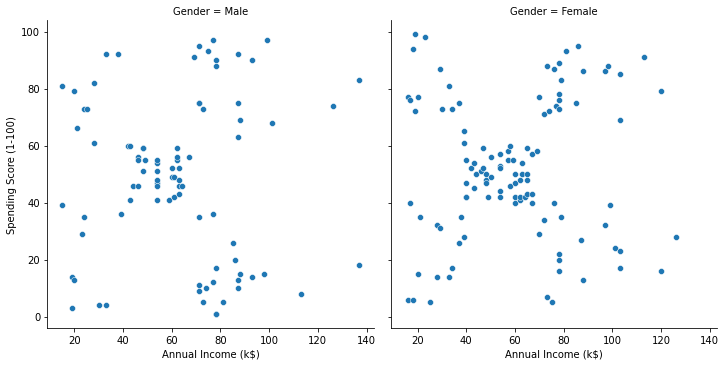

In [195]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', col='Gender',kind='scatter', data=df)

Gender is making no major difference

C:\Users\ashi\Anaconda3\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


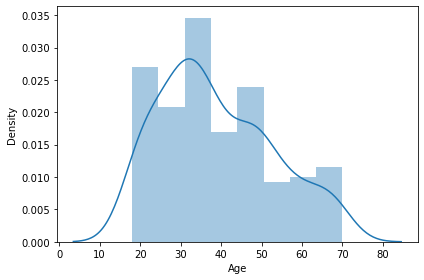

C:\Users\ashi\Anaconda3\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


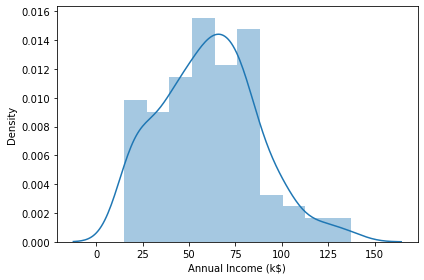

C:\Users\ashi\Anaconda3\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


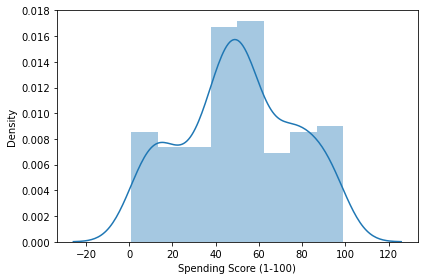

In [196]:
# include the columns you want
dfcat=df[df.columns[df.columns.isin(['Age','Annual Income (k$)','Spending Score (1-100)'])]]

for i, col in enumerate(dfcat.columns):
    plt.figure(i)
    ax=sns.distplot(dfcat[col])
    plt.tight_layout()
    plt.show()

We will segment customers based on two variables-annual income and spending score.

C:\Users\ashi\Anaconda3\python\lib\site-packages\seaborn\axisgrid.py:1595: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ashi\Anaconda3\python\lib\site-packages\seaborn\axisgrid.py:1668: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


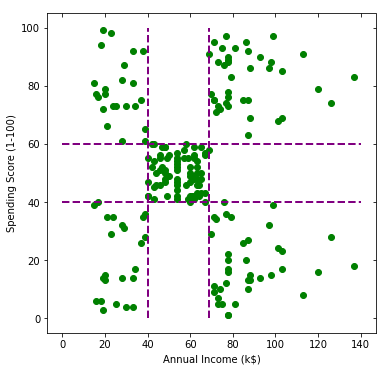

In [197]:
grid = sns.JointGrid(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'], space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
plt.vlines(x=[40, 69], colors='purple',ymin=0, ymax=100, ls='--', lw=2)
plt.hlines(y=[40, 60], colors='purple',xmin=0, xmax=140, ls='--', lw=2)


We can clearly see the boundaries.

In [198]:
df=df[['Annual Income (k$)','Spending Score (1-100)']]

In [199]:
def score(c):
    if (c['Annual Income (k$)'] <= 40 and c['Spending Score (1-100)'] <= 40):
        return 4
    elif (c['Annual Income (k$)'] <= 69 and c['Spending Score (1-100)'] <= 60):
          return 3
    elif (c['Annual Income (k$)'] > 69 and c['Spending Score (1-100)'] <= 40):
          return 2  
    elif (c['Annual Income (k$)']<= 40 and c['Spending Score (1-100)'] >60) :
          return 5 
    else:
        return 1

df['Score'] = df.apply(score, axis = 1)  

<ipython-input-199-3eee632ca1df>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score'] = df.apply(score, axis = 1)


In [200]:
df

,Annual Income (k$),Spending Score (1-100),Score
0,15,39,4
1,15,81,5
2,16,6,4
3,16,77,5
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


In [206]:
def score_cat(c):
    if c['Score'] == 1 :
        return 'high income-high spending score'
    elif c['Score'] == 2:
          return 'high income-low spending score'
    elif c['Score']==3:
          return 'mid income-mid spending score'  
    elif c['Score']== 4:
          return 'low income-low spending score' 
    else:
        return 'low income-high spending score'

df['Score_cat'] = df.apply(score_cat, axis = 1)  

<ipython-input-206-544655e52d62>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_cat'] = df.apply(score_cat, axis = 1)


Text(0, 0.5, 'per segment')

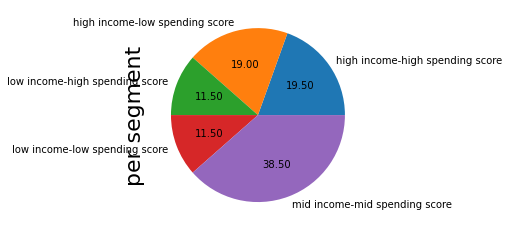

In [211]:
ax1=df.groupby('Score_cat').size().plot(kind='pie', autopct='%.2f')
ax1.set_ylabel('per segment', size=22)

In [210]:
df

,Annual Income (k$),Spending Score (1-100),Score,Score_cat
0,15,39,4,low income-low spending score
1,15,81,5,low income-high spending score
2,16,6,4,low income-low spending score
3,16,77,5,low income-high spending score
4,17,40,4,low income-low spending score
...,...,...,...,...
195,120,79,1,high income-high spending score
196,126,28,2,high income-low spending score
197,126,74,1,high income-high spending score
198,137,18,2,high income-low spending score


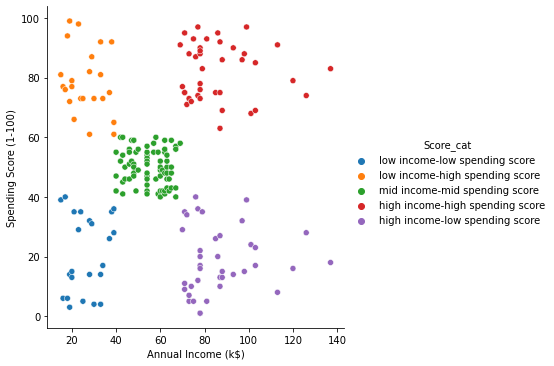

In [212]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)',hue='Score_cat',kind='scatter', data=df)

<AxesSubplot:xlabel='Score_cat', ylabel='count'>

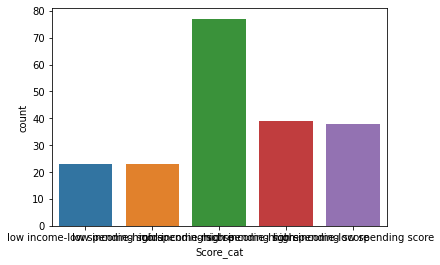

In [228]:
ax=sns.countplot(x='Score_cat',data=df)
ax